<a href="https://colab.research.google.com/github/gulshan0201/DATA-Science/blob/main/ML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

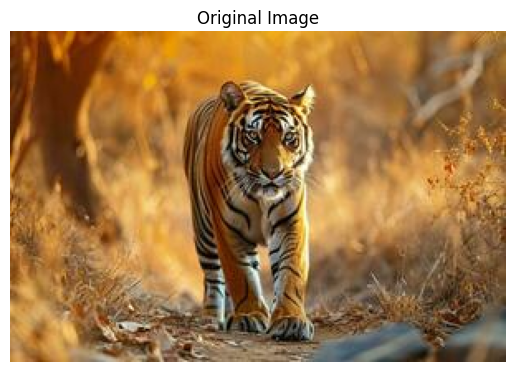

Image shape: (200, 300, 3)


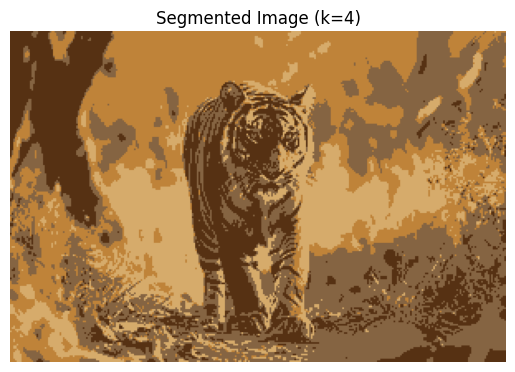

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Load image
img = io.imread("img1.jpg")   #image url: https://static.vecteezy.com/system/resources/thumbnails/036/324/708/small/ai-generated-picture-of-a-tiger-walking-in-the-forest-photo.jpg

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Shape
print("Image shape:", img.shape)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
rows, cols, channels = img.shape
pixels = img.reshape(-1, channels)


# Applying K-Mean Clustering
k = 4
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
labels = kmeans.fit_predict(pixels)

# Reconstruct segmented image
segmented_img = kmeans.cluster_centers_[labels]
segmented_img = segmented_img.reshape(rows, cols, channels).astype(np.uint8)

plt.imshow(segmented_img)
plt.title(f"Segmented Image (k={k})")
plt.axis("off")
plt.show()




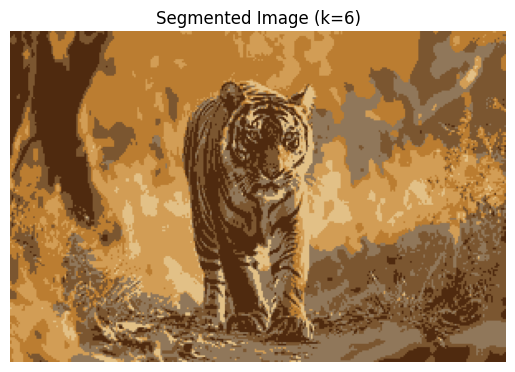

In [ ]:
# Considering K = 6

# Applying K-Mean Clustering
k = 6
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
labels = kmeans.fit_predict(pixels)

# Reconstruct segmented image
segmented_img = kmeans.cluster_centers_[labels]
segmented_img = segmented_img.reshape(rows, cols, channels).astype(np.uint8)

plt.imshow(segmented_img)
plt.title(f"Segmented Image (k={k})")
plt.axis("off")
plt.show()


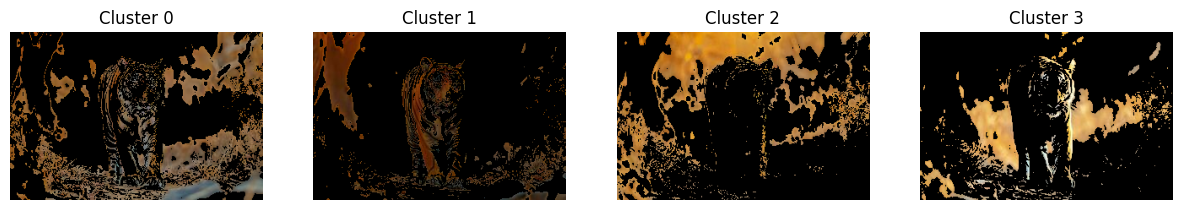

In [ ]:
# View segmentation masks
segmented_labels = labels.reshape(rows, cols)

fig, axes = plt.subplots(1, k, figsize=(15, 5))
for i in range(k):
    mask = (segmented_labels == i)
    segmented_part = np.zeros_like(img)
    segmented_part[mask] = img[mask]
    axes[i].imshow(segmented_part)
    axes[i].set_title(f"Cluster {i}")
    axes[i].axis("off")
plt.show()


# Task 2 Elbow Graph

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# 1. Load the image
img = io.imread("img2.jpg")
rows, cols, channels = img.shape

# Reshape image into 2D array of pixels
pixels = img.reshape(-1, channels)


# 2. Elbow Method to find K
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    km.fit(pixels)
    inertias.append(km.inertia_)   # inertia = within-cluster sum of squares

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


# 3. Choose K (from elbow)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init="auto", random_state=42)
labels = kmeans.fit_predict(pixels)


# 4. Reconstruct segmented image
segmented_img = kmeans.cluster_centers_[labels]
segmented_img = segmented_img.reshape(rows, cols, channels).astype(np.uint8)


# 5. Show Original vs Segmented
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented_img)
plt.title(f"Segmented Image (k={optimal_k})")
plt.axis("off")

plt.show()


KeyboardInterrupt: 